In [ ]:
CREATING A SESSION

In [52]:
from pyspark.sql import SparkSession

In [53]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [54]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [55]:
spark

READING THE DATA

In [ ]:
df = spark.read.csv(r"PySpark\06235099999.csv",header=True)

In [56]:
spark.read.csv(r"PySpark\06235099999.csv",header=True).show()

+----------+-------------------+------+---------+---------+---------+------------+-----------+---------+---------------+--------------+-----------+------------+-------+-------+-------+-----------+----+----+----+----+----+--------+--------+----+------------------+------------------+------------------+------------------+--------------------+--------------------+----+---------------+----------------+------+---------------+---------------+---------------+--------------------+----+
|   STATION|               DATE|SOURCE| LATITUDE|LONGITUDE|ELEVATION|        NAME|REPORT_TYPE|CALL_SIGN|QUALITY_CONTROL|           WND|        CIG|         VIS|    TMP|    DEW|    SLP|        AA1| AA2| AA3| AJ1| AW1| AW2|     AZ1|     AZ2| ED1|               GA1|               GA2|               GA3|               GA4|                 GE1|                 GF1| KA1|            MA1|             MD1|   OC1|            OD1|            OD2|            OD3|                 REM| EQD|
+----------+-------------------+----

In [58]:
type(df)

pyspark.sql.dataframe.DataFrame

In [59]:
df.printSchema()

root
 |-- STATION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- SOURCE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- ELEVATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- CALL_SIGN: string (nullable = true)
 |-- QUALITY_CONTROL: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- DEW: string (nullable = true)
 |-- SLP: string (nullable = true)
 |-- AA1: string (nullable = true)
 |-- AA2: string (nullable = true)
 |-- AA3: string (nullable = true)
 |-- AJ1: string (nullable = true)
 |-- AW1: string (nullable = true)
 |-- AW2: string (nullable = true)
 |-- AZ1: string (nullable = true)
 |-- AZ2: string (nullable = true)
 |-- ED1: string (nullable = true)
 |-- GA1: string (nullable = true)
 |-- GA2: string (nullable = true

DATA PROCESSING- SELECTING RELEVANT ROWS FOR MY ANALYSIS

In [60]:
df_interest = df.select('DATE','WND','CIG','VIS','TMP')

In [61]:
df_interest.show()

+-------------------+--------------+-----------+------------+-------+
|               DATE|           WND|        CIG|         VIS|    TMP|
+-------------------+--------------+-----------+------------+-------+
|2023-01-01T00:00:00|220,1,N,0120,1|00750,1,C,N|012000,1,9,9|+0120,1|
|2023-01-01T00:02:00|220,1,V,0124,1|00762,1,C,N|009999,1,9,9|+0120,1|
|2023-01-01T00:11:00|220,1,V,0118,1|00762,1,9,N|009999,1,9,9|+0120,1|
|2023-01-01T00:15:00|220,1,V,0113,1|00701,1,C,N|009999,1,9,9|+0120,1|
|2023-01-01T00:25:00|220,1,V,0118,1|00640,1,C,N|009999,1,9,9|+0120,1|
|2023-01-01T00:39:00|220,1,N,0113,1|00914,1,C,N|009999,1,9,9|+0120,1|
|2023-01-01T00:43:00|220,1,V,0113,1|00762,1,C,N|009000,1,9,9|+0120,1|
|2023-01-01T00:47:00|220,1,V,0113,1|00640,1,9,N|008000,1,9,9|+0120,1|
|2023-01-01T00:55:00|220,1,V,0118,1|00671,1,C,N|007000,1,9,9|+0120,1|
|2023-01-01T01:00:00|220,1,N,0120,1|01500,1,9,N|006000,1,9,9|+0112,1|
|2023-01-01T01:12:00|220,1,V,0124,1|00457,1,9,N|007000,1,9,9|+0110,1|
|2023-01-01T01:25:00

In [63]:
df_interest.take(30)

[Row(DATE='2023-01-01T00:00:00', WND='220,1,N,0120,1', CIG='00750,1,C,N', VIS='012000,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:02:00', WND='220,1,V,0124,1', CIG='00762,1,C,N', VIS='009999,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:11:00', WND='220,1,V,0118,1', CIG='00762,1,9,N', VIS='009999,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:15:00', WND='220,1,V,0113,1', CIG='00701,1,C,N', VIS='009999,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:25:00', WND='220,1,V,0118,1', CIG='00640,1,C,N', VIS='009999,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:39:00', WND='220,1,N,0113,1', CIG='00914,1,C,N', VIS='009999,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:43:00', WND='220,1,V,0113,1', CIG='00762,1,C,N', VIS='009000,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:47:00', WND='220,1,V,0113,1', CIG='00640,1,9,N', VIS='008000,1,9,9', TMP='+0120,1'),
 Row(DATE='2023-01-01T00:55:00', WND='220,1,V,0118,1', CIG='00671,1,C,N', VIS='007000,1,9,9', TMP='+0120,1'),
 Row(DATE=

In [64]:
df_interest.printSchema()

root
 |-- DATE: string (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)



In [ ]:
DATA PROCESSING - DATA TYPE CONVERSION

In [65]:
from pyspark.sql.types import TimestampType

In [66]:
df_interest = df_interest.withColumn('DATE', df_interest['DATE'].cast(TimestampType()))

In [67]:
df_interest.printSchema()

root
 |-- DATE: timestamp (nullable = true)
 |-- WND: string (nullable = true)
 |-- CIG: string (nullable = true)
 |-- VIS: string (nullable = true)
 |-- TMP: string (nullable = true)



In [ ]:
DATA PROCESSING - SPLITTING EACH COLUMN VALUES INTO OWN COLUMNS

In [69]:
from pyspark.sql import functions as F
df_processing = df_interest.select('DATE',F.split('WND',',').alias('wind_split'),F.split('CIG',',').alias('cig_split'),F.split('VIS',',').alias('vis_split'),F.split('TMP',',').alias('tmp_split'))

In [70]:
df_processing.show()

+-------------------+--------------------+----------------+-----------------+----------+
|               DATE|          wind_split|       cig_split|        vis_split| tmp_split|
+-------------------+--------------------+----------------+-----------------+----------+
|2023-01-01 00:00:00|[220, 1, N, 0120, 1]|[00750, 1, C, N]|[012000, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:02:00|[220, 1, V, 0124, 1]|[00762, 1, C, N]|[009999, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:11:00|[220, 1, V, 0118, 1]|[00762, 1, 9, N]|[009999, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:15:00|[220, 1, V, 0113, 1]|[00701, 1, C, N]|[009999, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:25:00|[220, 1, V, 0118, 1]|[00640, 1, C, N]|[009999, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:39:00|[220, 1, N, 0113, 1]|[00914, 1, C, N]|[009999, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:43:00|[220, 1, V, 0113, 1]|[00762, 1, C, N]|[009000, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:47:00|[220, 1, V, 0113, 1]|[00640, 1, 9, N]|[008000, 1, 9, 9]|[+0120, 1]|
|2023-01-01 00:55:00|

In [71]:
df_processed = df_processing.select('DATE', *[df_processing['wind_split'][i] for i in range(5)], *[df_processing['cig_split'][i] for i in range(4)],*[df_processing['vis_split'][i] for i in range(4)], *[df_processing['tmp_split'][i] for i in range(2)])

In [72]:
df_processed.show()

+-------------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|               DATE|wind_split[0]|wind_split[1]|wind_split[2]|wind_split[3]|wind_split[4]|cig_split[0]|cig_split[1]|cig_split[2]|cig_split[3]|vis_split[0]|vis_split[1]|vis_split[2]|vis_split[3]|tmp_split[0]|tmp_split[1]|
+-------------------+-------------+-------------+-------------+-------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|2023-01-01 00:00:00|          220|            1|            N|         0120|            1|       00750|           1|           C|           N|      012000|           1|           9|           9|       +0120|           1|
|2023-01-01 00:02:00|          220|            1|            V|         0124|            1|       00762|        

In [ ]:
DATA PROCESSING - DATA TYPE CONVERSION

In [74]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
casted_df = df_processed.select('DATE',col('wind_split[0]').cast(IntegerType()),col('wind_split[1]').cast(IntegerType()),'wind_split[2]',col('wind_split[3]').cast(IntegerType()),col('wind_split[4]').cast(IntegerType()),col('cig_split[0]').cast(IntegerType()),col('cig_split[1]').cast(IntegerType()),'cig_split[2]','cig_split[3]',col('vis_split[0]').cast(IntegerType()),col('vis_split[1]').cast(IntegerType()),col('vis_split[2]').cast(IntegerType()),col('vis_split[3]').cast(IntegerType()),col('tmp_split[0]').cast(IntegerType()),col('tmp_split[1]').cast(IntegerType()))

In [76]:
casted_df.printSchema()

root
 |-- DATE: timestamp (nullable = true)
 |-- wind_split[0]: integer (nullable = true)
 |-- wind_split[1]: integer (nullable = true)
 |-- wind_split[2]: string (nullable = true)
 |-- wind_split[3]: integer (nullable = true)
 |-- wind_split[4]: integer (nullable = true)
 |-- cig_split[0]: integer (nullable = true)
 |-- cig_split[1]: integer (nullable = true)
 |-- cig_split[2]: string (nullable = true)
 |-- cig_split[3]: string (nullable = true)
 |-- vis_split[0]: integer (nullable = true)
 |-- vis_split[1]: integer (nullable = true)
 |-- vis_split[2]: integer (nullable = true)
 |-- vis_split[3]: integer (nullable = true)
 |-- tmp_split[0]: integer (nullable = true)
 |-- tmp_split[1]: integer (nullable = true)



In [77]:
from pyspark.sql.functions import min

In [78]:
casted_df.agg(min(col('tmp_split[0]'))).show()

+-----------------+
|min(tmp_split[0])|
+-----------------+
|              -40|
+-----------------+



In [79]:
casted_df.count()

45000

DATA PROCESSING - REMOVING MISSING VALUES AND ONLY KEEPING VALUES THAT PASSED QUALITY CHECKS

In [81]:
casted_df = casted_df.filter(casted_df['wind_split[4]'] == 1)
casted_df = casted_df.filter(casted_df['wind_split[3]'] != 9999)
casted_df = casted_df.filter(casted_df['vis_split[0]'] != 999999)
casted_df = casted_df.filter(casted_df['vis_split[1]'] == 1)
casted_df = casted_df.filter(casted_df['tmp_split[0]'] != 9999)
casted_df = casted_df.filter(casted_df['tmp_split[1]'] == 1)
casted_df = casted_df.filter(casted_df['cig_split[0]'] != 99999)
casted_df = casted_df.filter(casted_df['cig_split[1]'] == 1)




In [82]:
casted_df.count()

41228

DATA PROCESSING - FURTHER SELECTING RELEVANT COLUMNS NOW THAT SPLIT HAS BEEN APPLIED AND ALSO DROPPING DUPLICATES

In [83]:
casted_df = casted_df.select('DATE','wind_split[3]', 'cig_split[0]','vis_split[0]', 'tmp_split[0]')

In [84]:
casted_df = casted_df.dropDuplicates()

In [85]:
casted_df.count()

41200

DATA PROCESSING - SCALING VALUES DOWN ACCORDING TO PDF DOCUMENT 

In [86]:
casted_df = casted_df.withColumn("wind_split[3]" , col("wind_split[3]")/10)

In [87]:
casted_df = casted_df.withColumn("tmp_split[0]" , col("tmp_split[0]")/10)

FEATURE ENGINERRING

In [89]:
from pyspark.sql.functions import weekofyear

In [90]:
casted_df_week = casted_df.withColumn("week_of_year", weekofyear(col("Date")))

In [91]:
casted_df_week.show()

+-------------------+-------------+------------+------------+------------+------------+
|               DATE|wind_split[3]|cig_split[0]|vis_split[0]|tmp_split[0]|week_of_year|
+-------------------+-------------+------------+------------+------------+------------+
|2023-01-01 22:00:00|          1.0|         480|       11000|         8.8|          52|
|2023-01-03 16:00:00|          7.0|        1500|       21000|         7.9|           1|
|2023-01-05 19:25:00|          7.2|         518|        9999|        10.0|           1|
|2023-01-05 21:55:00|          7.2|         305|        9000|        10.0|           1|
|2023-01-09 03:10:00|          6.7|         274|        9999|         7.0|           2|
|2023-01-09 07:35:00|          3.6|         853|        9999|         6.0|           2|
|2023-01-09 15:03:00|          6.7|         610|        9999|         8.0|           2|
|2023-01-10 19:55:00|         13.9|         244|        9999|         9.0|           2|
|2023-01-10 21:28:00|         16

In [92]:
from pyspark.sql.functions import dayofyear

In [93]:
casted_df_day = casted_df.withColumn("day_of_year", dayofyear(col("Date")))

In [94]:
casted_df_day.show()

+-------------------+-------------+------------+------------+------------+-----------+
|               DATE|wind_split[3]|cig_split[0]|vis_split[0]|tmp_split[0]|day_of_year|
+-------------------+-------------+------------+------------+------------+-----------+
|2023-01-01 22:00:00|          1.0|         480|       11000|         8.8|          1|
|2023-01-03 16:00:00|          7.0|        1500|       21000|         7.9|          3|
|2023-01-05 19:25:00|          7.2|         518|        9999|        10.0|          5|
|2023-01-05 21:55:00|          7.2|         305|        9000|        10.0|          5|
|2023-01-09 03:10:00|          6.7|         274|        9999|         7.0|          9|
|2023-01-09 07:35:00|          3.6|         853|        9999|         6.0|          9|
|2023-01-09 15:03:00|          6.7|         610|        9999|         8.0|          9|
|2023-01-10 19:55:00|         13.9|         244|        9999|         9.0|         10|
|2023-01-10 21:28:00|         16.5|        

APPLYING A GROUPBY WITH THE FEATURE ENGINEERED COLUMNS

In [95]:
from pyspark.sql.functions import avg

In [96]:
casted_df_week = casted_df_week.groupBy("week_of_year").agg(avg("wind_split[3]").alias("WindSpeedAvg"),avg("cig_split[0]").alias("Cig_Avg"),avg("vis_split[0]").alias("Vis_Avg"),avg("tmp_split[0]").alias("Tmp_Avg"))

In [97]:
casted_df_day = casted_df_day.groupBy("day_of_year").agg(avg("wind_split[3]").alias("WindSpeedAvg"),avg("cig_split[0]").alias("Cig_Avg"),avg("vis_split[0]").alias("Vis_Avg"),avg("tmp_split[0]").alias("Tmp_Avg"))

In [98]:
print(casted_df_week.count())
print(casted_df_day.count())

52
365


DATA VISUALISATIONS

In [99]:
pd_df_week = casted_df_week.toPandas()
pd_df_day = casted_df_day.toPandas()

In [100]:
print(type(pd_df_week))
print(type(pd_df_day))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [101]:
pd_df_week.sort_values(by='week_of_year', ascending=True,inplace=True)
pd_df_day.sort_values(by='day_of_year', ascending=True,inplace=True)

In [102]:
pd_df_day.head()

,day_of_year,WindSpeedAvg,Cig_Avg,Vis_Avg,Tmp_Avg
79,1,7.670000,2071.023077,9268.015385,10.293846
324,2,4.508276,1248.048276,10447.041379,8.063448
96,3,7.354098,2276.737705,10531.459016,6.504918
181,4,12.050685,961.739726,7025.198630,10.615068
122,5,7.212057,1144.241135,8780.382979,9.791489


In [103]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'WindSpeedAvg')

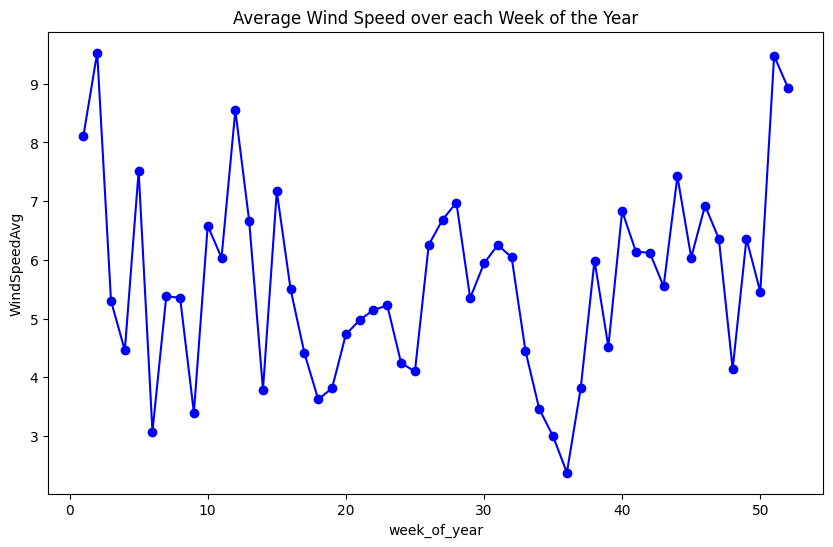

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(pd_df_week['week_of_year'], pd_df_week['WindSpeedAvg'], marker='o', color='b')
plt.title("Average Wind Speed over each Week of the Year")
plt.xlabel('week_of_year')
plt.ylabel('WindSpeedAvg')

Text(0, 0.5, 'WindSpeedAvg')

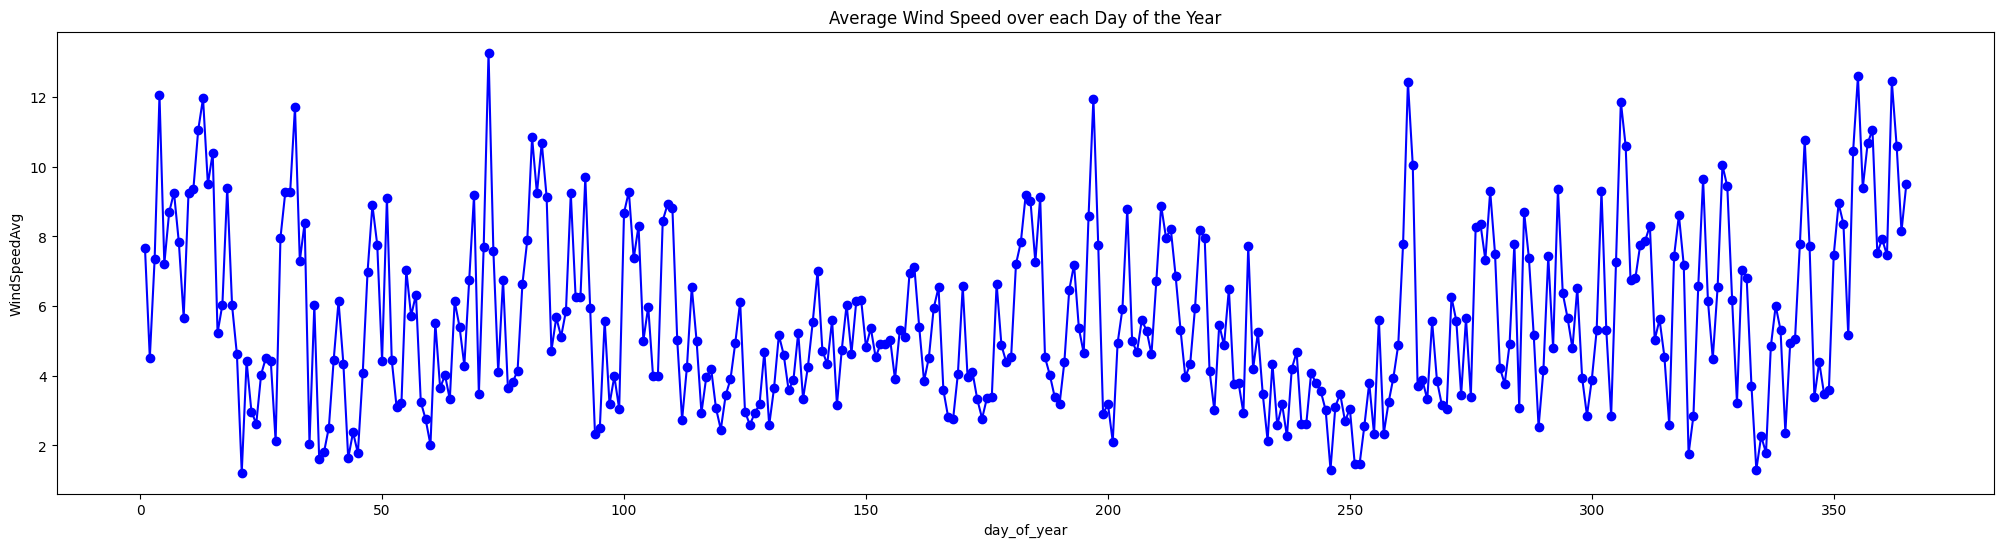

In [105]:
plt.figure(figsize=(25, 6))
plt.plot(pd_df_day['day_of_year'], pd_df_day['WindSpeedAvg'], marker='o', color='b')
plt.title("Average Wind Speed over each Day of the Year")
plt.xlabel('day_of_year')
plt.ylabel('WindSpeedAvg')

Text(0, 0.5, 'Cig_Avg')

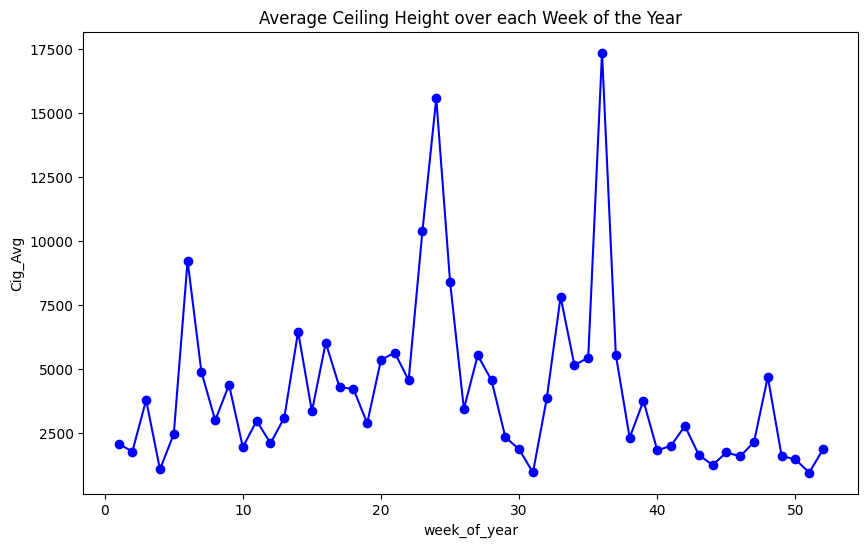

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(pd_df_week['week_of_year'], pd_df_week['Cig_Avg'], marker='o', color='b')
plt.title("Average Ceiling Height over each Week of the Year")
plt.xlabel('week_of_year')
plt.ylabel('Cig_Avg')

Text(0, 0.5, 'Cig_Avg')

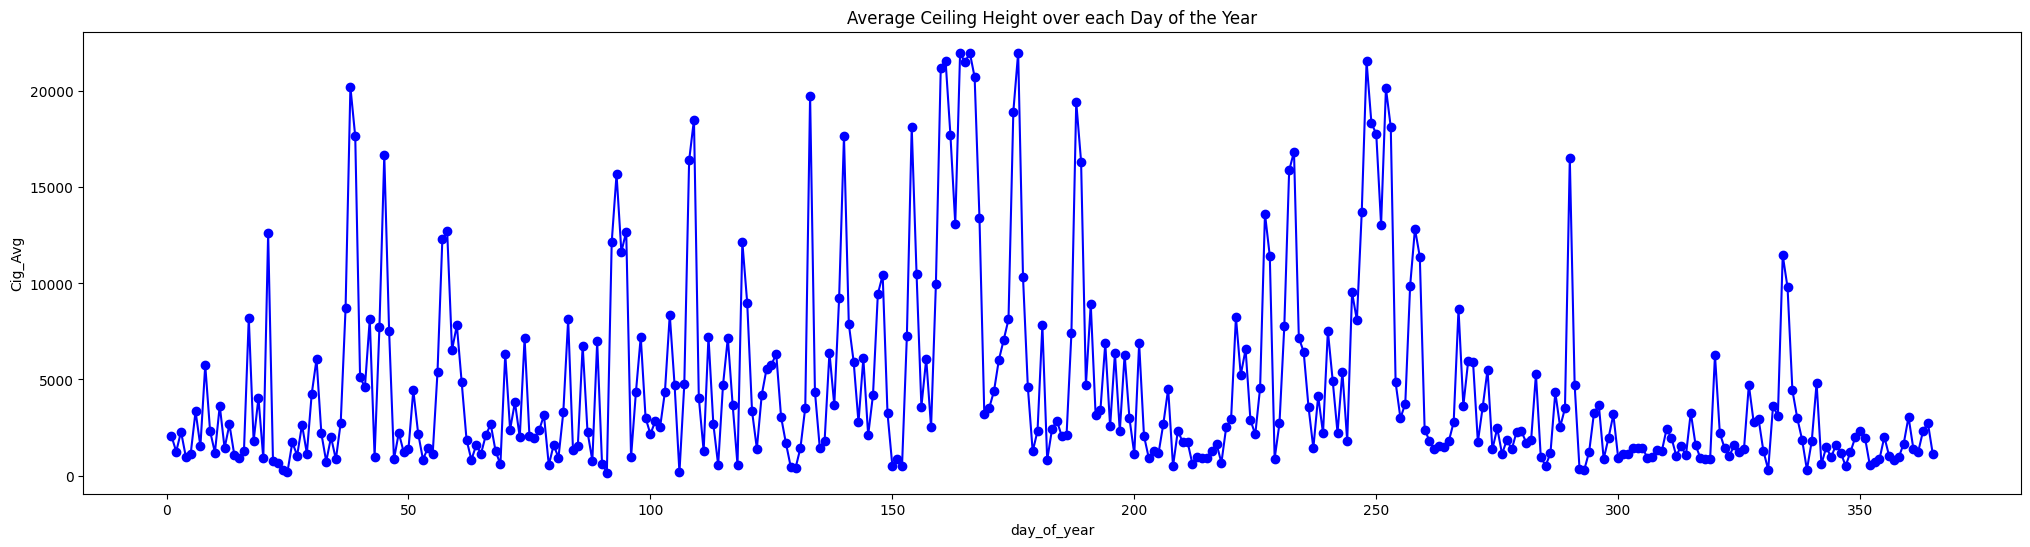

In [107]:
plt.figure(figsize=(25, 6))
plt.plot(pd_df_day['day_of_year'], pd_df_day['Cig_Avg'], marker='o', color='b')
plt.title("Average Ceiling Height over each Day of the Year")
plt.xlabel('day_of_year')
plt.ylabel('Cig_Avg')

Text(0, 0.5, 'Vis_Avg')

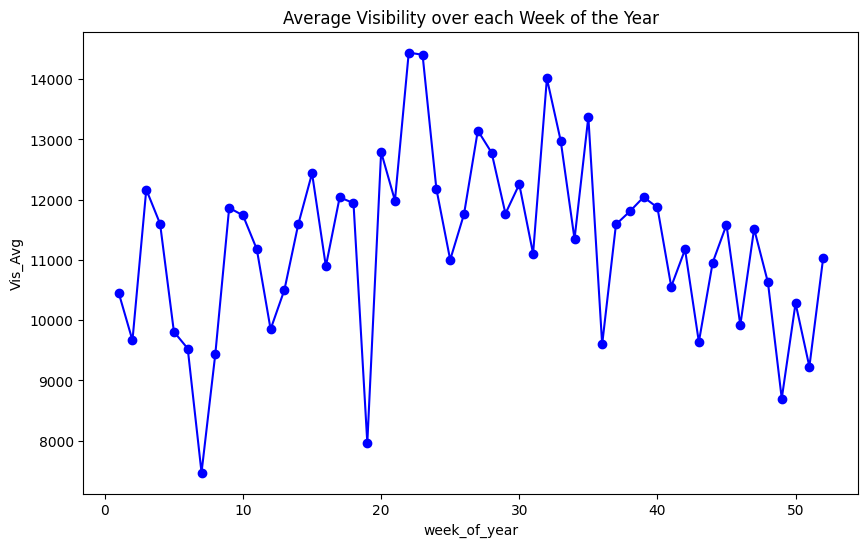

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(pd_df_week['week_of_year'], pd_df_week['Vis_Avg'], marker='o', color='b')
plt.title("Average Visibility over each Week of the Year")
plt.xlabel('week_of_year')
plt.ylabel('Vis_Avg')

Text(0, 0.5, 'Vis_Avg')

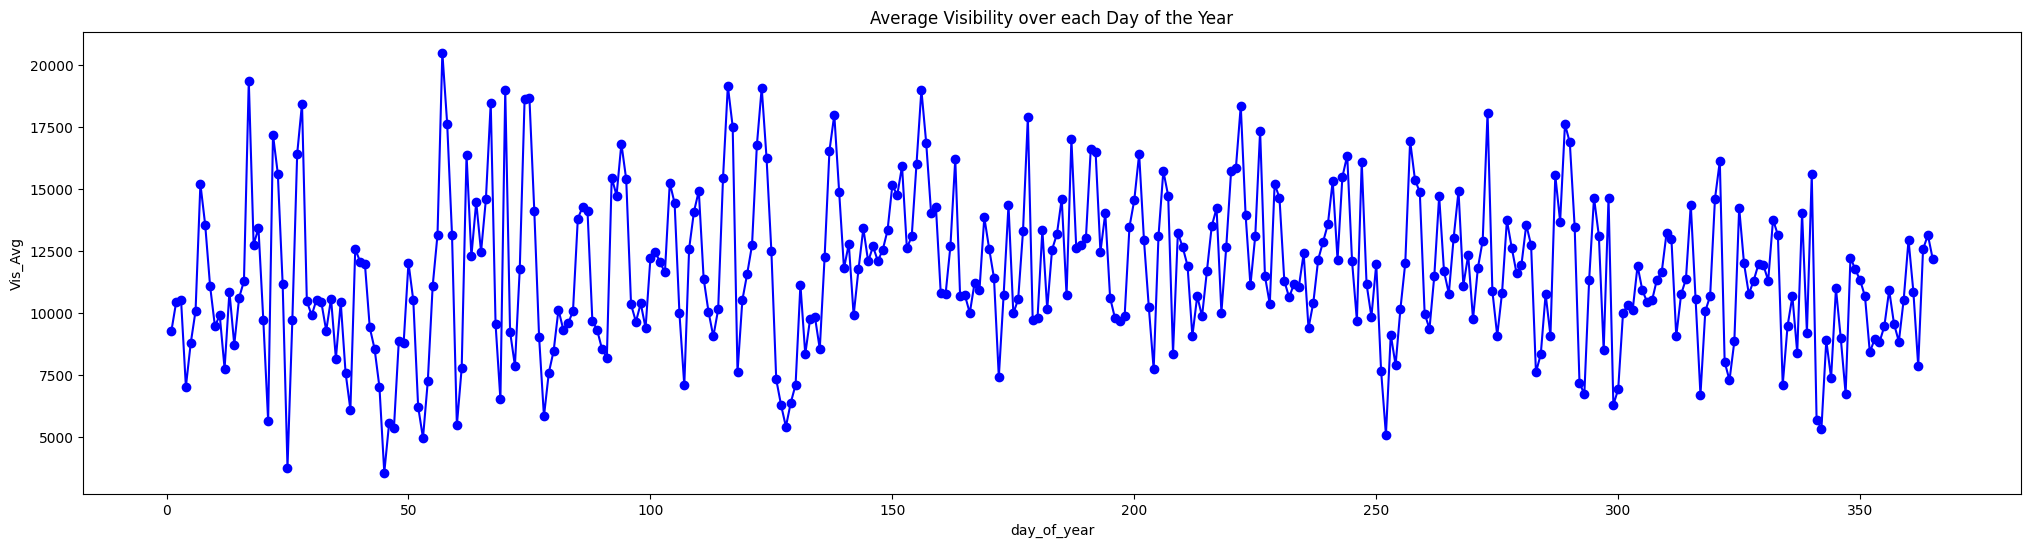

In [109]:
plt.figure(figsize=(25, 6))
plt.plot(pd_df_day['day_of_year'], pd_df_day['Vis_Avg'], marker='o', color='b')
plt.title("Average Visibility over each Day of the Year")
plt.xlabel('day_of_year')
plt.ylabel('Vis_Avg')

Text(0, 0.5, 'Tmp_Avg')

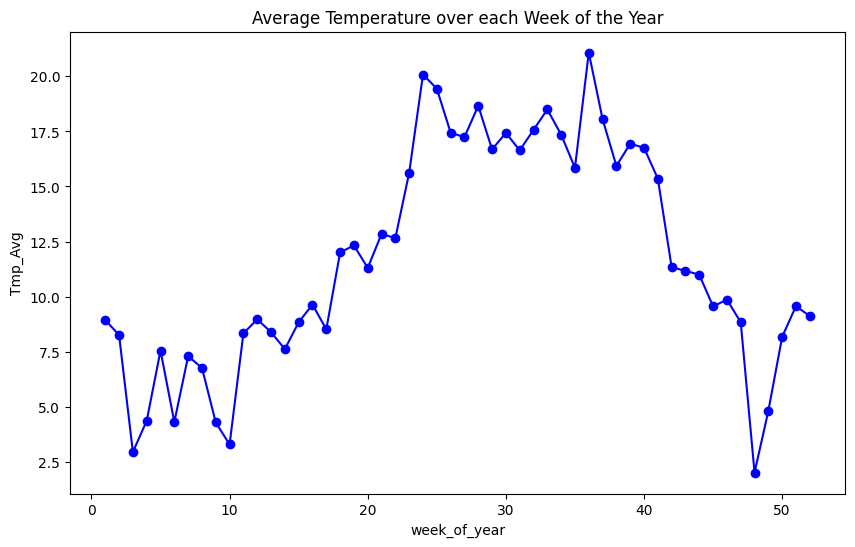

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(pd_df_week['week_of_year'], pd_df_week['Tmp_Avg'], marker='o', color='b')
plt.title("Average Temperature over each Week of the Year")
plt.xlabel('week_of_year')
plt.ylabel('Tmp_Avg')

Text(0, 0.5, 'Tmp_Avg')

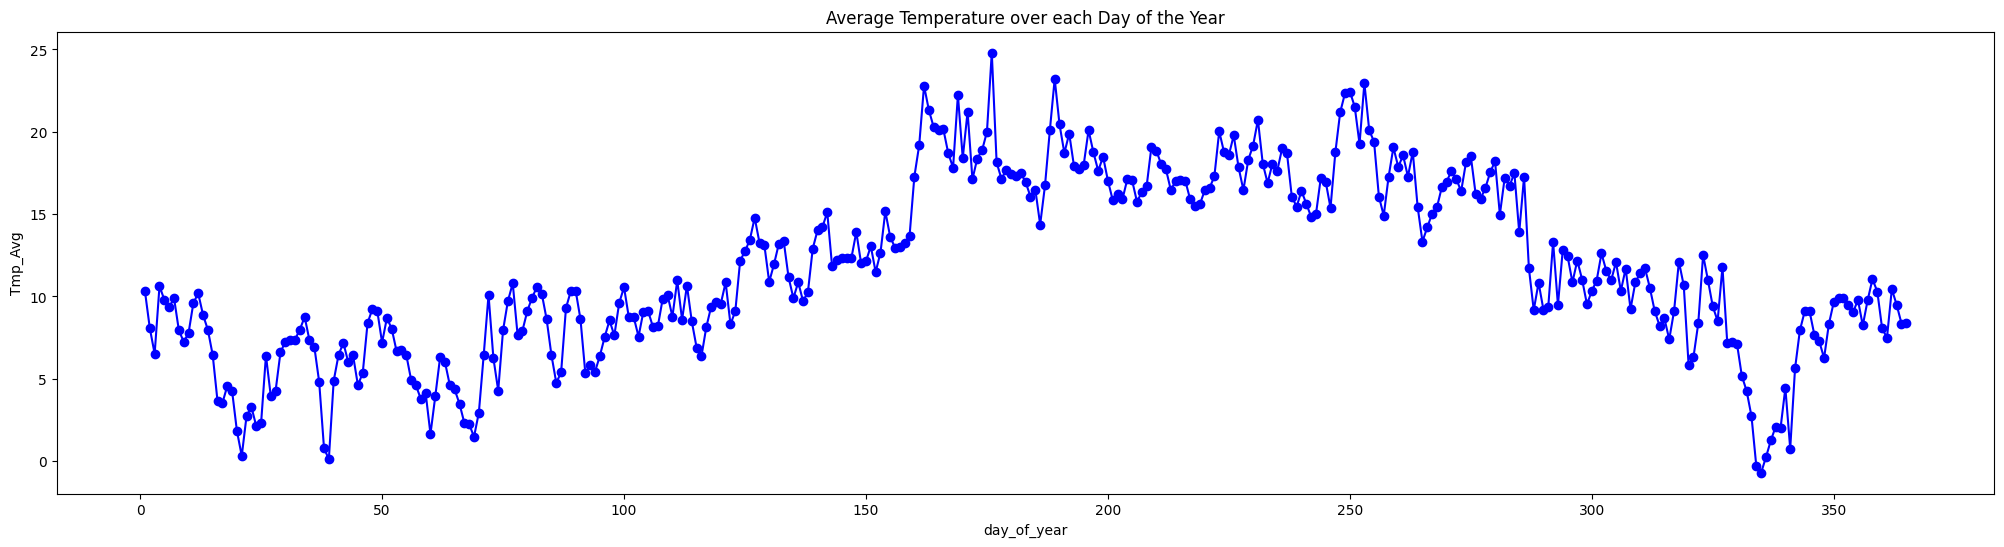

In [111]:
plt.figure(figsize=(25, 6))
plt.plot(pd_df_day['day_of_year'], pd_df_day['Tmp_Avg'], marker='o', color='b')
plt.title("Average Temperature over each Day of the Year")
plt.xlabel('day_of_year')
plt.ylabel('Tmp_Avg')

MACHINE LEARNING

In [112]:

from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
     

In [115]:
features = ['WindSpeedAvg', 'Cig_Avg', 'Vis_Avg', 'Tmp_Avg']
assembler = VectorAssembler(inputCols=features, outputCol='features')
scaler = StandardScaler(inputCol='features', outputCol='scaled_feat', withMean = True)
kmeans_algo = KMeans(featuresCol='scaled_feat')

In [116]:
pipeline = Pipeline(stages=[assembler,scaler,kmeans_algo])

In [117]:
paramGrid = (ParamGridBuilder().addGrid(KMeans.k, [2, 3, 4, 5]).build())

In [118]:
eval = ClusteringEvaluator(predictionCol="prediction",
                           featuresCol="scaled_feat",
                           metricName="silhouette",
                           distanceMeasure="cosine")

In [119]:
crossval = CrossValidator(estimator=pipeline , estimatorParamMaps=paramGrid , evaluator=eval , numFolds= 4)

In [120]:
model = crossval.fit(casted_df_day)

In [121]:
model.bestModel.stages[-1].getK()

2

In [122]:
output = model.transform(casted_df_day)

In [123]:
output.show()

+-----------+------------------+------------------+------------------+------------------+--------------------+--------------------+----------+
|day_of_year|      WindSpeedAvg|           Cig_Avg|           Vis_Avg|           Tmp_Avg|            features|         scaled_feat|prediction|
+-----------+------------------+------------------+------------------+------------------+--------------------+--------------------+----------+
|        148| 6.140789473684208|10428.105263157895|12538.671052631578|13.902631578947368|[6.14078947368420...|[0.21283083102027...|         1|
|        243|3.7790697674418583| 5392.686046511628|15487.639534883721|14.997674418604648|[3.77906976744185...|[-0.7233974501379...|         1|
|         31| 9.259999999999993| 6051.855555555556|10543.655555555555| 7.368888888888887|[9.25999999999999...|[1.44934213331600...|         0|
|         85|4.7219999999999995|           1538.54|          13809.26|6.4270000000000005|[4.72199999999999...|[-0.3496029018066...|         0|

VISUALING PREDICTIONS

In [124]:
vis_df = output.toPandas()

In [125]:
vis_df.sort_values(by="day_of_year",inplace=True)

In [126]:
vis_df

,day_of_year,WindSpeedAvg,Cig_Avg,Vis_Avg,Tmp_Avg,features,scaled_feat,prediction
79,1,7.670000,2071.023077,9268.015385,10.293846,"[7.67, 2071.023076923077, 9268.015384615384, 1...","[0.8190374603664715, -0.5179557034695453, -0.7...",0
324,2,4.508276,1248.048276,10447.041379,8.063448,"[4.508275862068973, 1248.048275862069, 10447.0...","[-0.4343270042343209, -0.6789050348582152, -0....",0
96,3,7.354098,2276.737705,10531.459016,6.504918,"[7.354098360655743, 2276.7377049180327, 10531....","[0.693808353780872, -0.4777240562915625, -0.35...",0
181,4,12.050685,961.739726,7025.198630,10.615068,"[12.050684931506847, 961.7397260273973, 7025.1...","[2.5556199654283396, -0.7348984499753496, -1.4...",0
122,5,7.212057,1144.241135,8780.382979,9.791489,"[7.21205673758866, 1144.241134751773, 8780.382...","[0.6375004929176528, -0.6992066163082564, -0.9...",0
...,...,...,...,...,...,...,...,...
220,361,7.458400,1391.920000,10863.488000,7.484000,"[7.458400000000001, 1391.92, 10863.488, 7.484]","[0.7351554045198548, -0.6507680156252065, -0.2...",0
14,362,12.449315,1232.397260,7860.239726,10.432877,"[12.449315068493158, 1232.3972602739725, 7860....","[2.713644140347198, -0.6819659068207713, -1.20...",0
83,363,10.587356,2315.896552,12573.977011,9.482759,"[10.587356321839067, 2315.896551724138, 12573....","[1.9755301159098837, -0.47006575350602336, 0.2...",0
232,364,8.144882,2733.314961,13145.669291,8.345669,"[8.144881889763782, 2733.314960629921, 13145.6...","[1.007289205157174, -0.3884311594259941, 0.479...",0


Text(0, 0.5, 'Model Prediction')

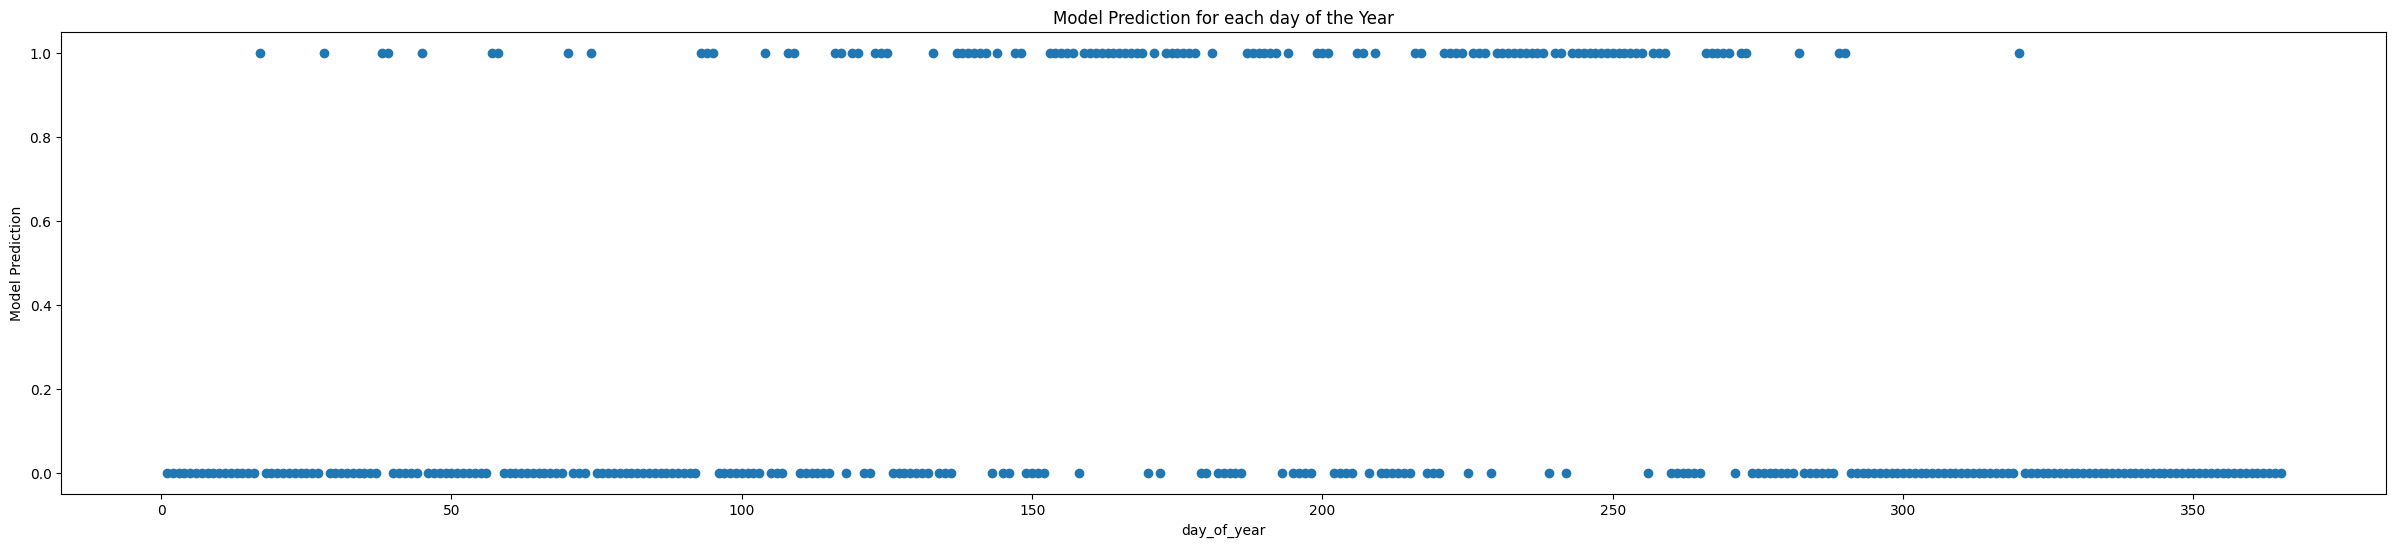

In [127]:
plt.figure(figsize=(30,6))
plt.scatter(vis_df["day_of_year"],vis_df["prediction"])
plt.title("Model Prediction for each day of the Year")
plt.xlabel('day_of_year')
plt.ylabel('Model Prediction')

In [133]:
a = vis_df[vis_df['prediction']==0]

In [135]:
a.set_index('day_of_year',inplace=True)

In [140]:
a.loc[180:220,['WindSpeedAvg','Cig_Avg','Vis_Avg','prediction']]

,WindSpeedAvg,Cig_Avg,Vis_Avg,prediction
day_of_year,,,,
180,4.541353,2320.187970,9790.601504,0
182,7.827419,807.104839,10156.798387,0
183,9.174528,2423.481132,12555.792453,0
184,9.013386,2852.409449,13175.590551,0
185,7.261765,2052.382353,14609.463235,0
186,9.124848,2098.854545,10718.187879,0
193,7.187156,3419.899083,12467.064220,0
195,4.640909,2550.806818,10615.113636,0
196,8.577143,6365.914286,9796.185714,0


In [144]:
vis_df[vis_df['prediction']==1].set_index('day_of_year').loc[180:220,['WindSpeedAvg','Cig_Avg','Vis_Avg','prediction']]

,WindSpeedAvg,Cig_Avg,Vis_Avg,prediction
day_of_year,,,,
181,7.200000,7815.493671,13353.721519,1
187,4.524242,7388.348485,17014.409091,1
188,4.016981,19421.603774,12640.603774,1
189,3.390909,16334.236364,12762.781818,1
190,3.176404,4708.460674,13024.089888,1
191,4.391304,8913.985507,16607.971014,1
192,6.452809,3172.213483,16504.887640,1
194,5.359756,6884.219512,14023.609756,1
199,2.901282,2972.948718,13473.538462,1
